In [1]:
from sympy import *
from sympy import Rational as frac
from sympy.plotting import plot
from IPython.display import display, HTML
init_printing(use_unicode=True)

## Problem 5.3
### (a)

In [2]:
theta, h, nu, kb, N, V, c = symbols('theta_D h nu_m k_B N V c_av')

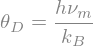

In [3]:
Eq(theta, h*nu/kb)

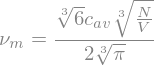

In [4]:
Eq(nu, (3/(4*pi)*N/V)**frac(1,3)*c)

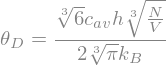

In [5]:
Eq(theta, h*nu/kb).subs(nu, (3/(4*pi)*N/V)**frac(1,3)*c)

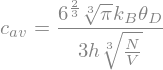

In [6]:
c_expr = solve(Eq(theta, h*nu/kb).subs(nu, (3/(4*pi)*N/V)**frac(1,3)*c),c)[0]
Eq(c, c_expr)

In [7]:
theta = 1890 ## K
N_A = 6.022e23 ## mol^-1
n = 1 ## assume 1 mol (the number does not matter here)
N = n*N_A ## number of carbon atoms in 1 mol of diamond
mw = 12 # g/mol molecular weight
rho = 3.25e3 # kg/m^3
V = n*mw/1000/rho # m^3
kb = 1.3806e-23 # J/K
h = 6.62607e-34 # J*s

In [8]:
c_value = solve(Eq(theta, h*nu/kb).subs(nu, (3/(4*pi)*N/V)**frac(1,3)*c),c)[0]
print("c_av = {:.4e}".format(c_value))

c_av = 1.1619e+4


### (b)

The experimental value of speed of sound in diamond is $c = 12000 \;m/s$, and calculated value $c_av = 11619 \;m/s$ is in agreement with the experimental value. 

Source of the experimental value: https://www.engineeringtoolbox.com/sound-speed-solids-d_713.html

## Problem 5.6
### (a)
For Debye model,
$$
C_V = 9Nk_B\left(\frac{T}{\theta_D}\right)^3 \int_0^{\theta_D/T} \frac{u^4e^udu}{(e^u-1)^2}
$$
Where
$$
u = \frac{h\nu}{k_BT}
$$
and 
$$
\theta_D = \frac{h\nu_m}{k_B}
$$

In [9]:
# for integration by gaussian quadrature
from scipy.integrate import quad
import numpy as np
from matplotlib import pyplot as plt

In [10]:
Nkb = 8.3145 # J mol^-1 K ideal gas constant
theta_D = 1000

def integrand(u):
    return u**4*np.exp(u)/(np.exp(u)-1)**2

def Cv_Debye(T):
    return 9*Nkb*(T/theta_D)**3*quad(integrand, 0, theta_D/T)[0]

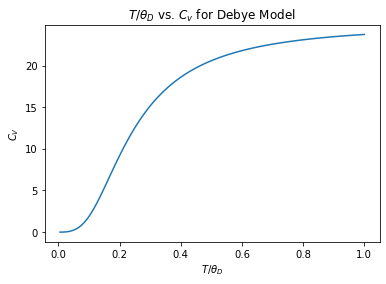

In [11]:
T = np.linspace(5, 1000, 100)
x = T/theta_D
y = np.array([Cv_Debye(temp) for temp in T])

plt.plot(x,y)
plt.title(r'$T/\theta_D$ vs. $C_v$ for Debye Model')
plt.xlabel(r'$T/\theta_D$')
plt.ylabel(r'$C_V$')
plt.show()

### (b)

For Eistein model,
$$
C_V = 3Nk_B\left(\frac{h\nu}{k_BT}\right)^2 \frac{e^{h\nu/k_BT}}{(e^{h\nu/k_BT}-1)^2}
$$
Define the tempurature $\theta_E$ as
$$
\theta_E = \frac{h\nu}{k_B}
$$
Therefore,
$$
C_V = 3Nk_B\left(\frac{\theta_E}{T}\right)^2 \frac{e^{\theta_E/T}}{(e^{\theta_E/T}-1)^2}
$$

In [12]:
theta_E = 1000 # K
def Cv_Eistein(T):
    return 3*Nkb*(theta_E/T)**2*np.exp(theta_E/T)/(np.exp(theta_E/T)-1)**2

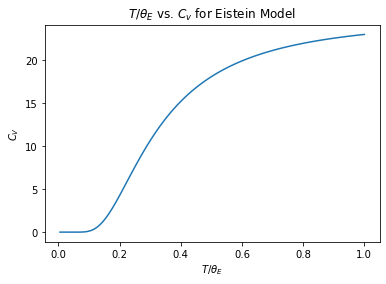

In [13]:
T = np.linspace(5, 1000, 100)
x = T/theta_E
y = np.array([Cv_Eistein(temp) for temp in T])

plt.plot(x,y)
plt.title(r'$T/\theta_E$ vs. $C_v$ for Eistein Model')
plt.xlabel(r'$T/\theta_E$')
plt.ylabel(r'$C_V$')
plt.show()

### Comparing the two models

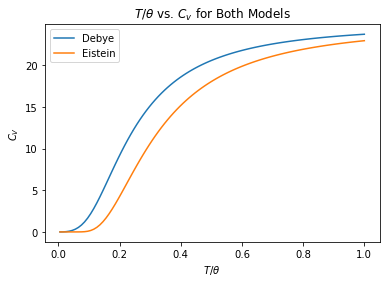

In [14]:
T = np.linspace(5, 1000, 100)
x = T/theta_D
y = np.array([Cv_Debye(temp) for temp in T])
plt.plot(x,y, label="Debye")

x = T/theta_E
y = np.array([Cv_Eistein(temp) for temp in T])
plt.plot(x,y, label="Eistein")

plt.title(r'$T/\theta$ vs. $C_v$ for Both Models')
plt.xlabel(r'$T/\theta$')
plt.ylabel(r'$C_V$')
plt.legend()
plt.show()

### Problem 5.11

In [15]:
kb = 1.3806e-23 # J/K
sigma = 1 
epsilon = 1e-23 # J (the value needs to be comparable to kb)

def integrand(r, T):
    U = 4*epsilon*((sigma/r)**12-(sigma/r)**6)
    return (1-np.exp(-U/(kb*T)))*r**2

def B(T):
    return 2*pi*quad(integrand, 0, np.inf, args = T)[0]

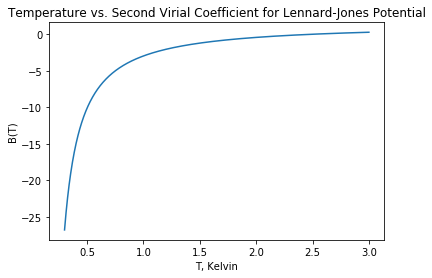

In [16]:
T = np.linspace(0.3,3,1000)
BT = np.array([B(x) for x in T])

plt.plot(T, BT)

plt.title('Temperature vs. Second Virial Coefficient for Lennard-Jones Potential')
plt.xlabel('T, Kelvin')
plt.ylabel('B(T)')
plt.show()

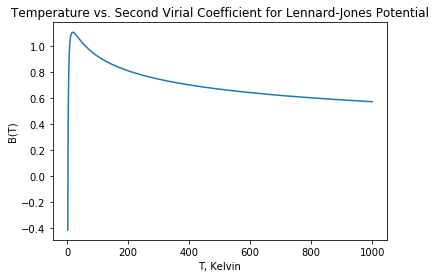

In [17]:
T = np.linspace(2,1000,1000)
BT = np.array([B(x) for x in T])

plt.plot(T, BT)

plt.title('Temperature vs. Second Virial Coefficient for Lennard-Jones Potential')
plt.xlabel('T, Kelvin')
plt.ylabel('B(T)')
plt.savefig('P5-11-2.png')
plt.show()

In [18]:
BT[-1].evalf()